<a href="https://colab.research.google.com/github/david-liu/ml-notes/blob/master/Q_Q_Plot_and_Box_Cox_Transformation(Power_Transformation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Q Plot and Box-Cox Transformation(Power Transformation)

+ Author: David Liu
+ Date: 2020/2/2

## Introduction

Normal(Gaussian) Normal is a very importance distribution in statistics, which has many properties, including as the 68-95-99.7 (empirical) rule, or the 3-sigma rule. But given observations of a R.V, we also have following question

+ (**Q1**) Does the  available dataset follows Normal distribution 
+ (**Q2**) If current distribution is not normal distribution, can we convert it to the normal distribution

For the first question, we can use Q-Q plot to campare current distribut to normal distrition, and for the second question, Box-Cox transformation is a important tool to make the data  normal distribution-like


## Q-Q Plot

>A Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.


Q-Q plot a powerful tool to check whether the data is normally distributed.

It shows the distribution of the data against the expected normal distribution.

![alt text](https://www.learnbyexample.org/wp-content/uploads/r/typical-quantile-quantile-qq-plot.png)

If the data is normally distributed, the points fall on the 45° reference line. If the data is non-normal, the points deviate noticeably from the reference line.

### Steps to a Q-Q graph

Consider we have a set X with the following data points:

$$
X = \{x_1, x_2, \dots, x_n\}
$$



#### Step 1: Order the items from smallest to largest.
The first step is to make a list sorted in ascending order for the values of x as:

$$
X = \{x_1^{'}, x_2^{'}, \dots, x_n^{'}\}
$$
    
#### Step 2: Calculate the percentiles
After we arranged the list of all the data points in an ascending ordered list, we need to compute the percentile values for the above list and obtain percentile values for the same(we took 100 percentile values).

#### Step 3: Calculate the  percentiles Normal distribution
Now, we need to get a set which is Normally Distributed (for the sake of this example) as follows and compute the percentiles for this list similar to the set X.

#### Step 4: Draw the Q-Q plot
We have obtained the list of 100 values for both the sets(ordered X percentiles and theoretical quantiles from Y).

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Normal_normal_qq.svg/600px-Normal_normal_qq.svg.png)

#### Step 5: Drawing Inference

If the points plotted on the graph lie on a **straight line**, then we can easily conclude that both the sets of data have similar distribution (In this case we can say that X is Normally Distributed)

### Examples

Asssume get a 1000 observation from a normal distribution $N(5.2, 0.1)$

In [0]:
import numpy as np

mu=5.2
simga=0.1

observations = np.random.normal(loc=mu, scale=simga, size=1000)


We can calculate the percentiles of the obversions

In [0]:
ob_percentiles = np.percentile(observations, range(1, 101, 1))

we can caculate the percentiles of a standard normal distribution

In [0]:
std_observations =  np.random.normal(loc=0, scale=1, size=1000)

theory_percentiles = np.percentile(std_observations, range(1, 101, 1))

Now we can draw the Q-Q plot

In [0]:
observations.shape

(1000,)

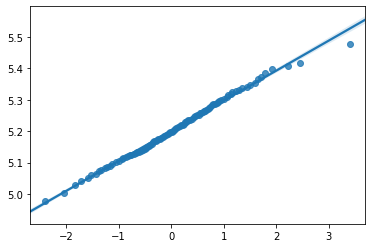

In [0]:
%matplotlib inline
import seaborn as sns

sns.regplot(theory_percentiles, ob_percentiles)

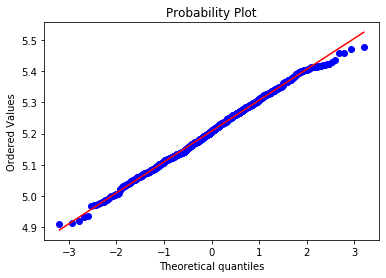

In [0]:
from scipy import stats
import pylab

stats.probplot(observations, dist=stats.norm, plot=pylab)
pylab.show()

## Box-Cox Transformation

Normality is an important assumption for many statistical techniques; if your data isn’t normal, Box-Cox Transformation is a useful data transformation technique used to stabilize variance, make the data more normal distribution-lik


### Transformation

The transformation relies primarily on a lambda ($\lambda$) variable that holds a value between $-5$ and $5$ that is automatically calculated to be optimal for your data. Specifically, the data is transformed in the following way:

$$
y_i^{(\lambda)} = \begin{cases}
          \frac{y_i^{\lambda}}{\lambda}  & \text{if $\lambda \leq 0$}\\
          \ln y_i & \text{if $\lambda=  0$}
        \end{cases}
$$

### Example

Let us some sample data from the [Beurea of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236), specifically flight duration

In [0]:
import pandas as pd

flight_duration = pd.read_csv("/Users/wliu7/Projects/notebook/ai_demo/notebooks/notes/box-cox-sample_data.csv")

flight_duration.head()

,MONTH,AIR_TIME
0,1,28
1,1,29
2,1,29
3,1,29
4,1,29


Let show the histogram of the flight duration

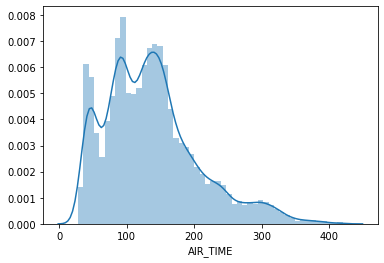

In [0]:
%matplotlib inline

import seaborn as sns

sns.distplot(flight_duration.AIR_TIME)

This data, while it isn't horrible, is significantly skewed. Lets see if we can improve the shape a little, we can draw the normal Q-Q plot 

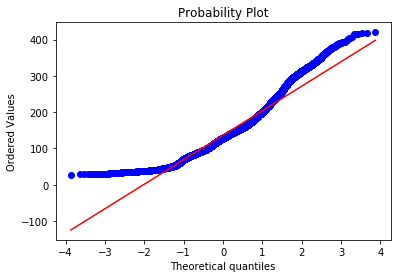

In [0]:
from scipy import stats
import pylab

stats.probplot(flight_duration.AIR_TIME, dist=stats.norm, plot=pylab)
pylab.show()

The Q-Q plot show the flight time are far away the normal distrtion, we can use Box Cox tranformation on it

0.2807713393426487


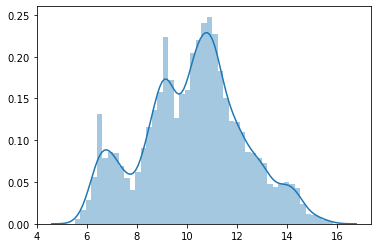

In [0]:
from scipy import stats

tranformed_flight_times, lam = stats.boxcox(flight_duration.AIR_TIME)

print(lam)

sns.distplot(tranformed_flight_times)

The transformed data is now much more regularized and ready to be used or transformed further.

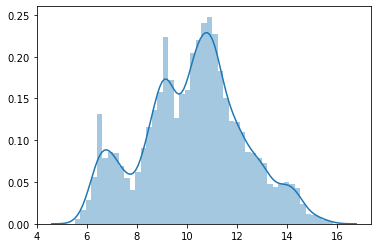

In [0]:
y = (np.power(flight_duration.AIR_TIME.values, lam) - 1) / lam

sns.distplot(y)